Databases
---
It can b treated as `tables`; itcan release the power for suitable statemets, SQL for instance, packages, pandas for instance, and Database, `duckdb` for instance added.

References
---
1. [Pandas](https://towardsdev.com/10-python-pandas-code-snippets-that-solve-tasks-efficiently-55ea4dc7d8b5)

Prelude
---
1. get data, [2004JanLayoff.txt](https://github.com/cchuang2009/2022-1/blob/main/2024/data/2004JanLayoff.txt), [Heart Attack](https://github.com/cchuang2009/2022-1/blob/main/2024/data/heart.csv)
2. create sub-foloder within the main folder, called `data`, and upload to store the data, but can't used directly
3. expand colab right menu, upload the data and used

In [1]:
import pandas as db

In [2]:
# histoical list of layouts in Janaury, 2025
# 1. https://www.visualcapitalist.com/all-the-major-tech-layoffs-in-2024-so-far/
# 2.  https://www.visualcapitalist.com/all-the-major-tech-layoffs-in-2024-so-far
# manulapated by chapgpt, blank(s) replced by ','


df=pd.read_csv("data/2004JanLayoff.txt",skiprows=1)
df.tail(2)

,Date,Company,JobsCut,Percent_of_Company_Employees,Industry
40,Jan 23,Brex,282,20%,Finance
41,Jan 23,Vroom,800,80%,Transport


In [8]:
# total 42 but 13 shorts in Percent_of_Company_Employees feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          42 non-null     object
 1   Company                       42 non-null     object
 2   JobsCut                       42 non-null     int64 
 3   Percent_of_Company_Employees  29 non-null     object
 4   Industry                      42 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.8+ KB


In [23]:
# only `'JobsCut' is in integer format (numeric type)
df.describe()

,JobsCut
count,42.000000
mean,286.595238
std,426.206869
min,10.000000
25%,60.000000
50%,96.500000
75%,300.000000
max,1800.000000


In [15]:
df.nunique()

Date                            16
Company                         42
JobsCut                         34
Percent_of_Company_Employees    19
Industry                        15
dtype: int64

In [3]:
df['Industry'].value_counts()

Industry
Consumer      9
Healthcare    6
Retail        6
Other         3
Media         3
Energy        2
Logistics     2
Transport     2
Data          2
Finance       2
Security      1
Travel        1
Hardware      1
Marketing     1
Food          1
Name: count, dtype: int64

Basics of pandas
---
1. Remove Cows: ` df.dropna(replac=True)`
2. Selection: `df.select_dtypes(include=['int', 'float']).columns
3. Filter Rows with Conditions:
   ```
   > df[(condition 1) & (condition 2]
   ```
4. Convert String Column to DateTime:
   ```
   > pd.to_datetime(df['Date'], format='%Y-%m-%d')
   ```
5. Calculate Row-wise Sum: `df['Total'] = df.iloc[:, 2].sum(axis=1)`
6. Merge DataFrames on a Specific Column:
   ```
   > merged_df = pd.merge(df1, other_df2, on='feature', how='left')
   ```
7. Apply a fynction:
   ```
   > df['Date']=df['Date'].apply(lambda x: convert(x))

   ```
8. Create Dummy Variables:
   ```
   > df_dummies = pd.get_dummies(df['Department'], prefix='Department')
   ```
9. Group by and Aggregate with Multiple Functions:
   ```
   > grouped_df = df.groupby('Industry').agg({'JobsCut': ['sum','sum']})
   ```
10. Reshape DataFrame with Melt:
   ```
   


In [4]:
#2 Find the numerical column

list(df.select_dtypes(include=['int', 'float']).columns)

['JobsCut']

In [5]:
# 3 the worse comapnies

df[df['JobsCut']>=1000]

,Date,Company,JobsCut,Percent_of_Company_Employees,Industry
11,Jan 08,Flipkart,1100,5%,Retail
12,Jan 08,Unity,1800,25%,Other
22,Jan 10,Google,1000,0.5%,Consumer
36,Jan 19,Wayfair,1650,13%,Retail


In [38]:
#pd.to_datetime(df['Date'], format='2024-%m-%d')
df['Date'][:][:2]

0    Jan 02
1    Jan 02
Name: Date, dtype: object

In [7]:
# 7
def convert(x):
   return '2024-01-'+x[-2:]
df['Date']=df['Date'].apply(lambda x: convert(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          42 non-null     object
 1   Company                       42 non-null     object
 2   JobsCut                       42 non-null     int64 
 3   Percent_of_Company_Employees  29 non-null     object
 4   Industry                      42 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.8+ KB


In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                            datetime64[ns]
Company                                 object
JobsCut                                  int64
Percent_of_Company_Employees            object
Industry                                object
dtype: object

In [9]:
# 9 summary of layout for each field
grouped_df = df.groupby('Industry').agg({'JobsCut': ['sum']})
print(grouped_df)

           JobsCut
               sum
Industry          
Consumer      3350
Data           360
Energy        1054
Finance        367
Food            60
Hardware        10
Healthcare     400
Logistics      139
Marketing      125
Media          224
Other         1893
Retail        2947
Security        60
Transport      848
Travel         200


In [10]:
#10 
melted_df = pd.melt(df, id_vars=['Company'], value_vars=['JobsCut'], var_name='Layout', value_name='Total')
melted_df

,Company,Layout,Total
0,The Messenger,JobsCut,24
1,FrontDesk,JobsCut,200
2,Orca Security,JobsCut,60
3,Lazada Group,JobsCut,100
4,Trigo,JobsCut,30
...,...,...,...
37,SolarEdge,JobsCut,900
38,Riot Games,JobsCut,530
39,TikTok,JobsCut,60
40,Brex,JobsCut,282


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(8,4))
sns.set_style("white")
# previous sns.distplot will be depreciates since 0.14
sns.histplot(melted_df['Total'],
             color='red',
             kde=True)

plt.title("Distribution of Layoff Positions",fontsize=20)
plt.xlabel("Layoff",fontsize=16)
plt.ylabel("Count",fontsize=16)

Second Example, Visualization
---
A picture is better than one thousand words!

General kinds of visualization include the following:
- Bar charts: Used to show comparisons between different categories.
- Line charts: Used to show trends over time or across different categories.
- Pie charts: Used to show proportions or percentages of different categories.
- Histograms: Used to show the distribution of a single variable.
- Heatmaps: Used to show the correlation between different variables.
- Scatter plots: Used to show the relationship between two continuous variables.

[Dataset, Heart Attack data from Kaggle]()

In [20]:
# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
heart = pd.read_csv('data/heart.csv')

In [23]:
# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [24]:
# check duplicated values: no missing value
heart.duplicated().sum()

1

In [25]:
# getting the statistical summary of dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
...,...,...,...,...,...,...,...,...
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slp,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thall,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

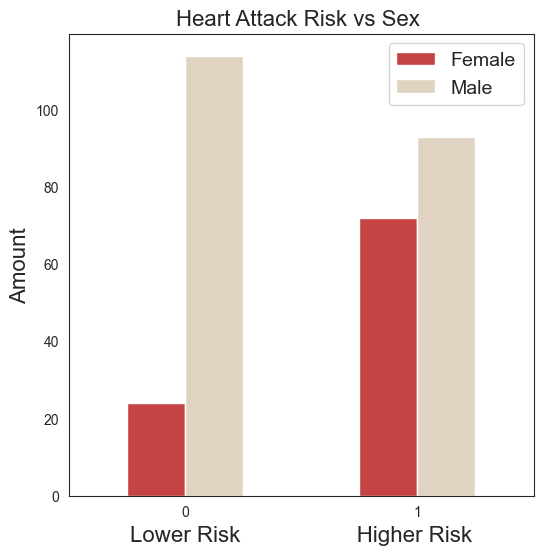

In [27]:
# Compare Heart Attack vs Sex 
df = pd.crosstab(heart['output'],heart['sex'])
sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);

plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("Lower Risk                   Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)

In [73]:
# plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

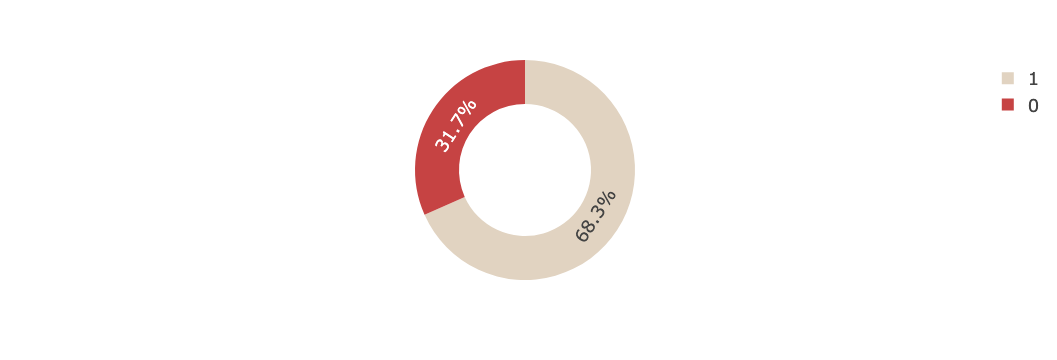

In [75]:
fig = px.pie(heart,
            names= "sex",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            #color_discrete_sequence=px.colors.sequential.RdBu
            )
fig.show()

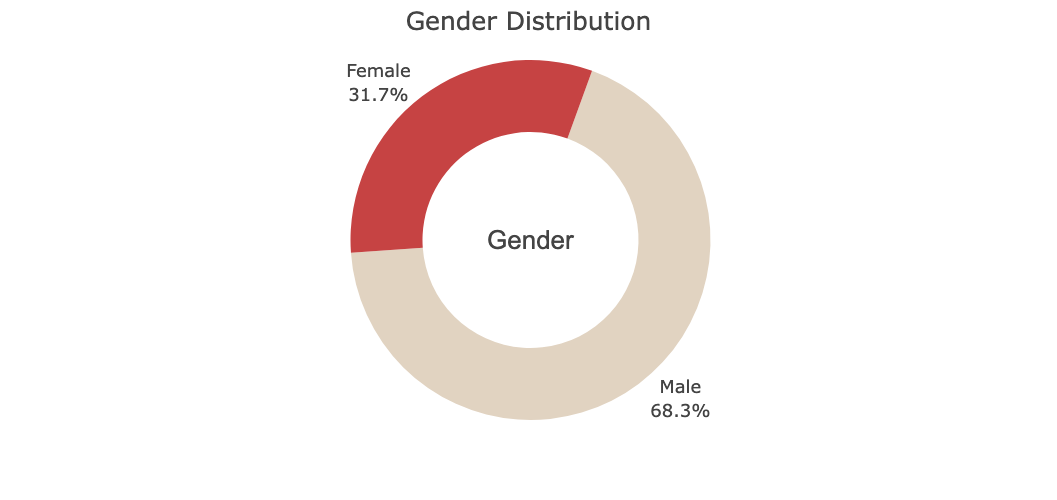

In [78]:
# Empty Pie Visualization

# Create a dictionary to map numerical values to text labels
sex_labels = {1: 'Male', 0: 'Female'}

# Create a new column in the heart dataframe with text labels
heart['sex_text'] = heart['sex'].map(sex_labels)


fig = px.pie(heart,
            names= "sex_text",
            template= "presentation",
            hole= 0.6,
            color_discrete_sequence=['#e1d3c1', '#c64343']
            )
# layout
fig.update_layout(title_text='Gender Distribution',
                  title_x=0.5,
                  font=dict( size=18),
                  autosize=False,
                  width=500,
                  height=500,
                  showlegend=False)

fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        #xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<span style='font-size: 26px; color=#555; font-family:Arial'>Gender<br></span>"))

fig.update_traces(textposition='outside',  textinfo='percent+label', rotation=20)
fig.show()

In [79]:
# colab: https://colab.research.google.com/drive/1hduQRKwoespAiF0Wv7UZIAZG9oz3WqcD
# 2022/2022_2_Python/Week_17_colab.ipynb

from pyecharts import options as opts
from pyecharts.charts import Pie

# Create a dictionary to map numerical values to text labels
sex_labels = {1: 'Male', 0: 'Female'}

# Create a new column in the heart dataframe with text labels
heart['sex_text'] = heart['sex'].map(sex_labels)

# Count the number of occurrences of each value in the 'sex_text' column
sex_counts = heart['sex_text'].value_counts()

# Create the pie chart
pie = Pie()
pie.add("", 
        [list(z) for z in zip(sex_counts.index, sex_counts.values)],
        radius=["40%", "70%"],
        rosetype="radius",
        label_opts=opts.LabelOpts(is_show=False),
)

# Customize the chart
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="Gender Distribution", title_textstyle_opts=opts.TextStyleOpts(font_size=18)),
    legend_opts=opts.LegendOpts(is_show=False)
)

# Set color palette
pie.set_colors(['#e1d3c1', '#c64343'])

# Render the chart
pie.render_notebook()

In [125]:
col==[['Female', 207], ['Male', 96]]

True

In [126]:
# Create a dictionary to map numerical values to text labels
sex_labels = {1: 'Male', 0: 'Female'}

# Create a new column in the heart dataframe with text labels
heart['sex_text'] = heart['sex'].map(sex_labels)

# Count the number of occurrences of each value in the 'sex_text' column
sex_counts = heart['sex_text'].value_counts()

In [144]:

# col= [list(z) for z in zip(sex_counts.index, sex_counts.values)]
p =(
   Pie()
   .add("",[['Female', 96], ['Male', 207]],
        radius=["40%", "70%"],
        center=["35%", "50%"], 
        #rosetype="radius", 
   )
   .set_global_opts(title_opts=opts.TitleOpts(title="Gender", 
                                               subtitle='',
                                               pos_left='left',
                                               pos_top='0%'))
   # set the output format
   .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} "))
   # set color 
   .set_colors(['#e1d3c1', '#c64343']) 
)

In [145]:
p.render()

'/Users/chu-chinghuang/Documents/2023/2023-2-Python/render.html'

In [146]:
from IPython.display import HTML
HTML("render.html")

In [72]:
heart['age'].value_counts()

dtype('int64')

/var/folders/xb/s7vwrt4153xbxzr8hc8tbdtr0000gn/T/ipykernel_22632/452452884.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




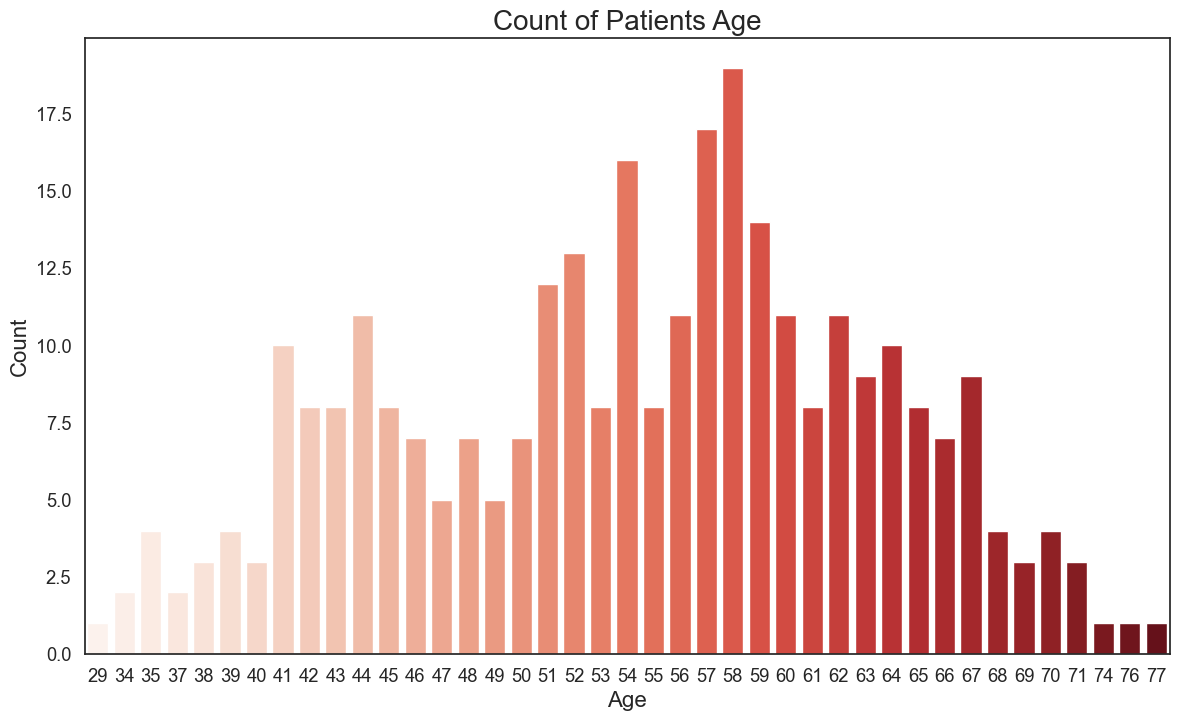

In [65]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')
      

plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16);

Text(0, 0.5, 'Density')

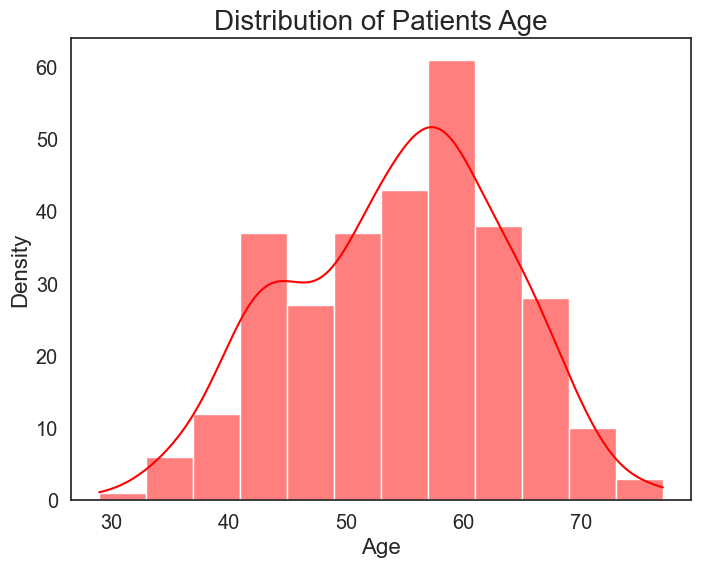

In [34]:
# age based analysis
sns.set(font_scale=1.3)

plt.figure(figsize=(8,6))
sns.set_style("white")
sns.histplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)

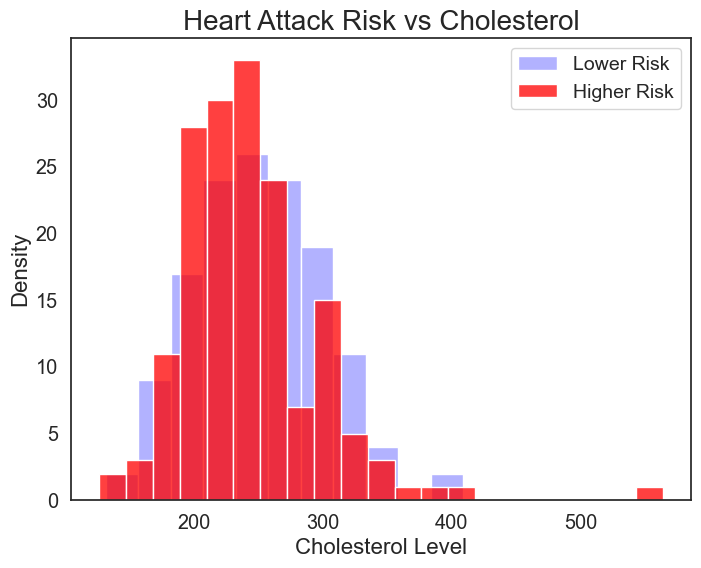

In [148]:
# Attack vs Cholesterol analysis
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.histplot(heart[heart["output"]==0]["chol"],alpha=0.3,
             color="blue")
sns.histplot(heart[heart["output"]==1]["chol"],
             color="red")

plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)


Text(0, 0.5, 'Cholesterol Level')

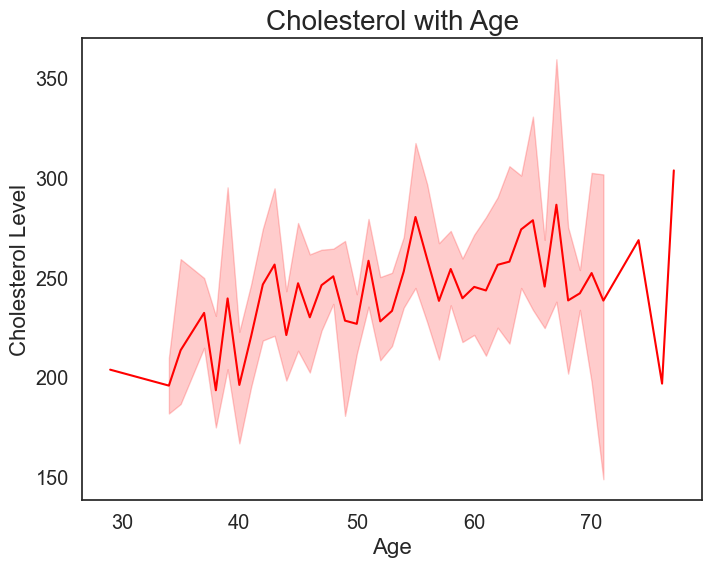

In [38]:
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")
plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)

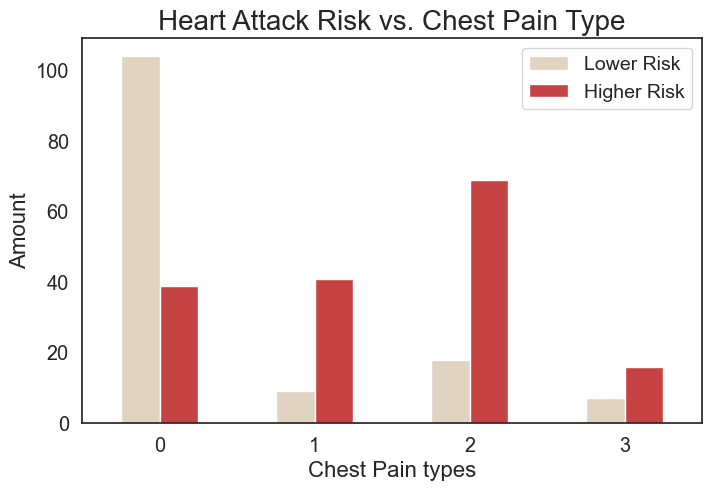

In [43]:
# Relation of Heart Attack with Chest Pain Type
df = pd.crosstab(heart['cp'], heart['output'])


# Make the crosstab more visual

sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(8,5),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);